<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/VggPretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16
from keras.applications import vgg19
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input


In [4]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16(weights='imagenet',include_top=True, input_shape=(224, 224, 3))

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
model_inception = InceptionV3(weights='imagenet',include_top=True, input_shape=(299, 299, 3))

96112376/96112376 [==============================] - 1s 0us/step


In [21]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model_resnet = ResNet50(weights='imagenet', include_top=True,input_shape=(224,224,3))

102967424/102967424 [==============================] - 1s 0us/step


In [8]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
#model_vgg19 = vgg19.VGG19()

In [9]:
#model_vgg19.summary()

In [10]:
#model.summary()

In [24]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("/content/1.png", target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

In [25]:
x.shape

(1, 224, 224, 3)

In [26]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img_incep = image.load_img("/content/1.png", target_size=(299, 299))

# Convert the image to a numpy array
x_incep = image.img_to_array(img_incep)

# Add a fourth dimension (since Keras expects a list of images)
x_incep = np.expand_dims(x_incep, axis=0)

In [27]:
x_incep.shape

(1, 299, 299, 3)

In [28]:
# Normalize the input image's pixel values to the range used when training the neural network
x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

1/1 [==============================] - 1s 537ms/step


In [29]:
predicted_classes

[[('n03796401', 'moving_van', 0.3617628),
  ('n03417042', 'garbage_truck', 0.28832757),
  ('n04146614', 'school_bus', 0.18685372),
  ('n03384352', 'forklift', 0.054314718),
  ('n03126707', 'crane', 0.027225727)]]

In [32]:
# Normalize the input image's pixel values to the range used when training the neural network
x_incep = preprocess_input(x_incep)

# Run the image through the deep neural network to make a prediction
predictions_incep = model_inception.predict(x_incep)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_incep = vgg16.decode_predictions(predictions_incep)
predicted_classes_incep

1/1 [==============================] - 3s 3s/step


[[('n03196217', 'digital_clock', 0.9851538),
  ('n03197337', 'digital_watch', 0.013271885),
  ('n03841143', 'odometer', 8.7518325e-05),
  ('n04328186', 'stopwatch', 8.247643e-05),
  ('n03590841', "jack-o'-lantern", 4.8409845e-05)]]

In [35]:
import matplotlib.pyplot as plt


In [37]:
org_img = image.load_img("/content/1.png", target_size=(299, 299))

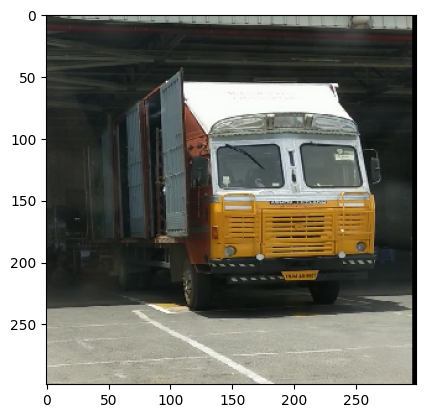

In [38]:
plt.imshow(org_img)

In [33]:
# Run the image through the deep neural network to make a prediction
predictions_resnet = model_resnet.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_resnet = vgg16.decode_predictions(predictions_resnet)

1/1 [==============================] - 1s 1s/step


In [34]:
predicted_classes_resnet

[[('n03796401', 'moving_van', 0.68651396),
  ('n03417042', 'garbage_truck', 0.065848574),
  ('n03126707', 'crane', 0.048894804),
  ('n03895866', 'passenger_car', 0.03814743),
  ('n04065272', 'recreational_vehicle', 0.026730228)]]

In [ ]:
# Run the image through the deep neural network to make a prediction
predictions_vgg19 = model_vgg19.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_vgg19 = vgg16.decode_predictions(predictions_vgg19)

1/1 [==============================] - 1s 803ms/step


In [ ]:
np.argmax(predictions)

10

In [ ]:
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Top predictions for this image:
Prediction: brambling - 0.740154
Prediction: goldfinch - 0.163929
Prediction: worm_fence - 0.077044
Prediction: robin - 0.013913
Prediction: indigo_bunting - 0.001278


In [ ]:
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes_incep[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Top predictions for this image:
Prediction: jacamar - 0.307391
Prediction: brambling - 0.261960
Prediction: goldfinch - 0.100633
Prediction: coucal - 0.006315
Prediction: robin - 0.005988


In [ ]:
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes_vgg19[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Top predictions for this image:
Prediction: brambling - 0.552583
Prediction: goldfinch - 0.437521
Prediction: worm_fence - 0.004211
Prediction: robin - 0.004163
Prediction: indigo_bunting - 0.000574


In [ ]:
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes_resnet[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Top predictions for this image:
Prediction: jacamar - 0.463661
Prediction: brambling - 0.215350
Prediction: indigo_bunting - 0.032037
Prediction: robin - 0.029579
Prediction: worm_fence - 0.028048
